In [375]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

def read_data_function():
    # data_frame = pd.read_csv(file_name, sep = ",")
    # data_frame = data_frame[["date", "open"]]
    # data_frame["date"] = pd.to_datetime(data_frame["date"], format = "%Y-%m-%d")
    #data_frame.index = data_frame.pop("date")
    #scaler = MinMaxScaler(feature_range = (-1, 1))
    #stock_price_val = data_frame["open"].values.reshape(-1,1)
    #data_frame["open"] = scaler.fit_transform(stock_price_val)
    tikcer= "^GSPC"
    start_date = "2020-01-01"
    stop_date = "2025-01-01"
    data_frame = yf.download(ticker, start = start_date, end = stop_date, interval = "1d")
    data_frame = pd.DataFrame(data_frame)
    return data_frame

[*********************100%***********************]  1 of 1 completed


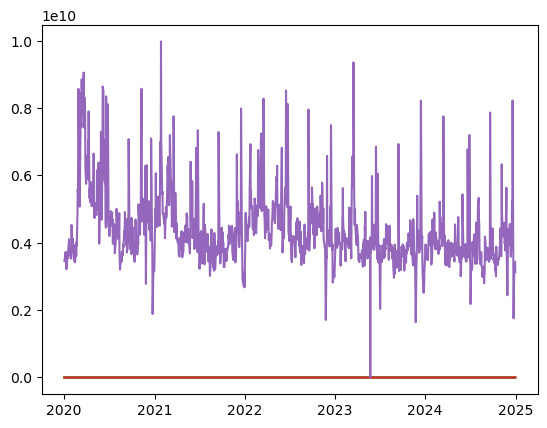

In [468]:
data = read_data_function()
plt.plot(data)
plt.show()

In [376]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import yfinance as yf

# ticker = "^GSPC"
# start = "2020-01-01"
# end   = "2025-01-01"

# # Pull daily data from Yahoo Finance
# df = yf.download(ticker, start=start, end=end, interval="1d")

# # Ensure expected columns, reset index to have Date as a column
# df = df.copy()
# df = pd.DataFrame(df)
# #df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
# df = df[["Open", "Date"]]
# df

# plt.plot(df)


In [377]:
read_data_function()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


In [378]:
import numpy as np
import pandas as pd
def data_prep_function(sequence_dataset, window_size):
    #sequence_dataset = [np.array(sequence_dataset[i*sliding_window_size: (i + 1) * sliding_window_size]) for i in range(len(sequence_dataset) // sliding_window_size)]
    #X = np.array([sequenc_dataset[i: i + num_steps] for i in range(len(sequence_dataset) - sliding_window_size)])
    #y = np.array([sequence_dataset[i + num_steps] for i in range(len(sequence_dataset) - sliding_window_size)])
    for i in range(1, window_size + 1):
        sequence_dataset[f"Open-{i}"] = sequence_dataset["Open"].shift(i)

        

    sequence_dataset = sequence_dataset.drop(["Close", "High","Low", "Volume"], axis = 1)
    sequence_dataset.dropna(inplace = True)
    return sequence_dataset

In [380]:
from sklearn.preprocessing import MinMaxScaler
def matrix_formatting_and_normalize_dataset(sliding_window_dataset):
    sliding_window_dataset = sliding_window_dataset.to_numpy()
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(sliding_window_dataset)
    return normalized_data

In [381]:
data = read_data_function()
window_data = data_prep_function(data, 10)
normalized_data = matrix_formatting_and_normalize_dataset(window_data)
normalized_data

[*********************100%***********************]  1 of 1 completed


array([[0.26650205, 0.26105228, 0.26186319, ..., 0.24401318, 0.24633264,
        0.25115314],
       [0.27194918, 0.26650205, 0.26105228, ..., 0.25041339, 0.24401318,
        0.24633264],
       [0.2712568 , 0.27194918, 0.26650205, ..., 0.24955248, 0.25041339,
        0.24401318],
       ...,
       [0.97818513, 0.98313476, 0.97251419, ..., 0.99335502, 0.99450813,
        0.9961194 ],
       [0.95567517, 0.97818513, 0.98313476, ..., 0.99039576, 0.99335502,
        0.99450813],
       [0.95543041, 0.95567517, 0.97818513, ..., 0.98910574, 0.99039576,
        0.99335502]])

In [382]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
def feature_target_modeling(dataset, window_size):
    X = dataset[:, 1:]
    y = dataset[:,0]
    X = np.flip(X, axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
    X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype = torch.float32)
    
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor


# def split_groups(X_train, X_test, y_train, y_test):
#     train_dataset = TensorDataset(X_train, y_train)
#     test_dataset = TensorDataset(X_test, y_test)

#     train_size = int(0.8 * len(train_dataset))
#     val_size = len(train_dataset) - train_size
#     train_sub, val_sub = random_split(train_dataset, [train_size, val_size])
#     val_loader = torch.utils.data.DataLoader(val_sub, batch_size=16, shuffle=False)

#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 16, shuffle = True)
#     test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 16, shuffle = False)
#     return train_loader, val_loader, test_loader

In [383]:
import numpy as np
from torch.utils.data import TensorDataset
import torch

class CustomLSTMDataSet(TensorDataset):
    def __getitem__(self, idx):
        X, y = super().__getitem__(idx)

        return X,y

In [384]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch
def split_groups(X_train, X_test, y_train, y_test):
    train_dataset = CustomLSTMDataSet(X_train, y_train)
    test_dataset = CustomLSTMDataSet(X_test, y_test)

    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_sub, val_sub = random_split(train_dataset, [train_size, val_size])
    val_loader = torch.utils.data.DataLoader(val_sub, batch_size=16, shuffle=False)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 16, shuffle = True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 16, shuffle = False)
    return train_loader, val_loader, test_loader

In [385]:
import math
import torch.nn as nn
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz, output_sz = 1):
        super().__init__()
        self.input_sz= input_sz
        self.hidden_size= hidden_sz
        self.W= nn.Parameter(torch.Tensor(input_sz, hidden_sz* 4))
        self.U= nn.Parameter(torch.Tensor(hidden_sz, hidden_sz* 4))
        self.bias= nn.Parameter(torch.Tensor(hidden_sz* 4))
        self.linear = nn.Linear(hidden_sz, output_sz)
        self.init_weights()

    def init_weights(self):
        stdv= 1.0/ math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, x,
                init_states=None):


        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _= x.size()
        hidden_seq= []
        if init_states is None:

            h_t, c_t= (torch.zeros(bs, self.hidden_size).to(x.device),
                            torch.zeros(bs, self.hidden_size).to(x.device))
        else:

             h_t, c_t= init_states

        HS= self.hidden_size
        for t in range(seq_sz):
                        x_t= x[:, t, :]
            # batch the computations into a single matrix multiplication
                        gates= x_t@ self.W+ h_t@ self.U+ self.bias
                        i_t, f_t, g_t, o_t= (
                            torch.sigmoid(gates[:, :HS]),# input
                            torch.sigmoid(gates[:, HS:HS*2]),# forget
                            torch.tanh(gates[:, HS*2:HS*3]),
                            torch.sigmoid(gates[:, HS*3:]),# output
                        )
                        c_t= f_t* c_t+ i_t* g_t
                        h_t= o_t* torch.tanh(c_t)
                        hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq= torch.cat(hidden_seq, dim=0)
            # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq= hidden_seq.transpose(0, 1).contiguous()
        output = self.linear(hidden_seq[:, -1, :])
        return output

In [562]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def train_model(model: torch.nn.Module, train_dataloader : DataLoader,val_dataloader: DataLoader, epochs: int):
    model.train(True)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    loss_function = torch.nn.MSELoss()
    loss_vectorize_train = np.zeros(epochs)
    loss_vectorize_val = np.zeros(epochs)

    for epoch in range(epochs):
        epoch_loss_train = 0
        for batch_idx_train, act_batch_train in enumerate(train_dataloader):
            X_trained, y_trained = act_batch_train[0], act_batch_train[1]
            optimizer.zero_grad()
            preds = model(X_trained)
            loss = loss_function(preds, y_trained)
            loss.backward()
            optimizer.step()
            epoch_loss_train += loss.item()
            loss_vectorize_train[epoch] = epoch_loss_train / len(train_dataloader)

        model.eval()

        with torch.no_grad():
            epoch_loss_val = 0
            for batch_idx_val, act_batch_val in enumerate(val_dataloader):
                X_validated, y_validated = act_batch_val[0], act_batch_val[1]
                preds_2 = model(X_validated)
                loss = loss_function(preds_2, y_validated)
                epoch_loss_val += loss.item()
                loss_vectorize_val[epoch] = epoch_loss_val / len(val_dataloader)

        print(f"Epoch {epoch}: Train loss {loss_vectorize_train[epoch] : .6f} || Val loss {loss_vectorize_val[epoch] : .6f}")



    return loss_vectorize_train, loss_vectorize_val, model

In [607]:
def test_model(model: torch.nn.Module, test_dataloader : DataLoader, epochs: int):
    model.train(False)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    loss_function = torch.nn.MSELoss()
    loss_vectorize_test = np.zeros(epochs)
    for epoch in range(epochs):
        for batch_idx_test, act_batch_test in enumerate(test_dataloader):
        
            with torch.no_grad():
                
                epoch_loss_test = 0
                X_tested, y_tested = act_batch_test[0], act_batch_test[1]
                preds_2 = model(X_tested)
                loss = loss_function(preds_2, y_tested)
                epoch_loss_test += loss.item()
                loss_vectorize_test[epoch] = epoch_loss_test / len(test_dataloader)

        print(f"Epoch {epoch}: Test loss {loss_vectorize_test[epoch] : .6f}")
    
    return loss_vectorize_test

In [388]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
def prediction_printer(X_train, model):
  with torch.no_grad():
      prediction = model(X_train).numpy()
        
  return prediction

In [512]:
data = read_data_function()
window_data_10 = data_prep_function(data, 10)
window_data_10 = window_data_10.to_numpy()
scaler = MinMaxScaler()
normalized_data_10 = scaler.fit_transform(window_data_10)
X_train_10, X_test_10, y_train_10, y_test_10 = feature_target_modeling(normalized_data_10,10)
train_loader_10, val_loader_10, test_loader_10 = split_groups(X_train_10, X_test_10, y_train_10, y_test_10)
model = CustomLSTM(1, 8)


[*********************100%***********************]  1 of 1 completed


In [594]:
loss_train_10, loss_val_10, model_10 = train_model(model, train_loader_10, val_loader_10,4)

Epoch 0: Train loss  0.000152 || Val loss  0.000173
Epoch 1: Train loss  0.000164 || Val loss  0.000132
Epoch 2: Train loss  0.000140 || Val loss  0.000170
Epoch 3: Train loss  0.000157 || Val loss  0.000128


In [609]:
loss_test_10 = test_model(model_10, test_loader_10, 50)

Epoch 0: Test loss  0.000010
Epoch 1: Test loss  0.000010
Epoch 2: Test loss  0.000010
Epoch 3: Test loss  0.000010
Epoch 4: Test loss  0.000010
Epoch 5: Test loss  0.000010
Epoch 6: Test loss  0.000010
Epoch 7: Test loss  0.000010
Epoch 8: Test loss  0.000010
Epoch 9: Test loss  0.000010
Epoch 10: Test loss  0.000010
Epoch 11: Test loss  0.000010
Epoch 12: Test loss  0.000010
Epoch 13: Test loss  0.000010
Epoch 14: Test loss  0.000010
Epoch 15: Test loss  0.000010
Epoch 16: Test loss  0.000010
Epoch 17: Test loss  0.000010
Epoch 18: Test loss  0.000010
Epoch 19: Test loss  0.000010
Epoch 20: Test loss  0.000010
Epoch 21: Test loss  0.000010
Epoch 22: Test loss  0.000010
Epoch 23: Test loss  0.000010
Epoch 24: Test loss  0.000010
Epoch 25: Test loss  0.000010
Epoch 26: Test loss  0.000010
Epoch 27: Test loss  0.000010
Epoch 28: Test loss  0.000010
Epoch 29: Test loss  0.000010
Epoch 30: Test loss  0.000010
Epoch 31: Test loss  0.000010
Epoch 32: Test loss  0.000010
Epoch 33: Test loss 

In [611]:
prediction_10 = prediction_printer(X_train_10, model)

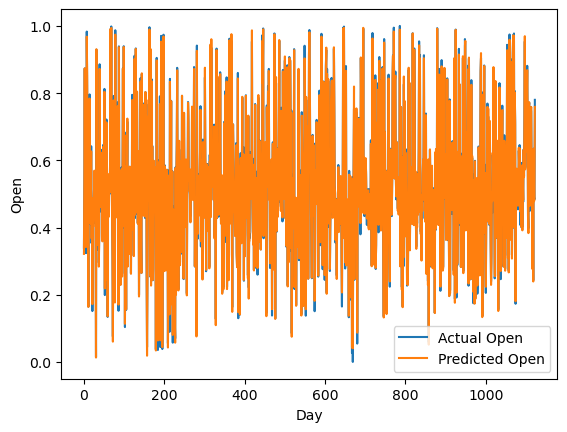

In [613]:
plt.plot(y_train_10, label='Actual Open')
plt.plot(prediction_10, label='Predicted Open')
plt.xlabel('Day')
plt.ylabel('Open')
plt.legend()
plt.show()

In [615]:

train_predictions = prediction_10.flatten()
dummies = np.zeros((X_train_10.shape[0], 11))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dummies[:, 0]
train_predictions

array([3512.00925796, 4323.37534909, 5609.90859648, ..., 4106.90152701,
       4128.94653115, 5173.65690715])

In [617]:

dummies = np.zeros((X_train_10.shape[0], 11))
dummies[:, 0] = y_train_10.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dummies[:, 0]
new_y_train

array([3583.04000322, 4356.45994832, 5608.55994655, ..., 4154.85014116,
       4127.95015574, 5253.43010522])

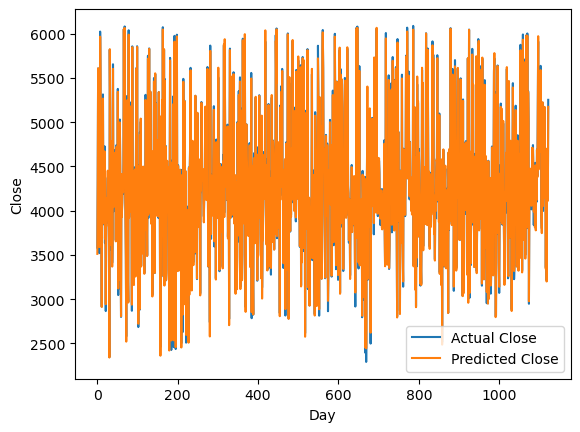

In [619]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [621]:

test_predictions = model_10(X_test_10).detach().numpy().flatten()

dummies = np.zeros((X_test_10.shape[0], 11))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dummies[:, 0]
test_predictions

array([4430.49804481, 4498.43042703, 4504.64096335, 3992.63168849,
       5511.59095248, 4650.55324901, 3686.78722536, 5295.03902326,
       3892.96018741, 4151.93289612, 4554.09591329, 3365.24775528,
       3890.11731395, 5263.14210534, 4139.05948125, 5455.7907597 ,
       3660.34286492, 4241.77150081, 5713.39127314, 4008.75005877,
       3382.33261651, 4750.92273359, 3689.03331499, 5288.91497078,
       3323.4061006 , 2969.09966699, 3877.85834191, 4380.74855172,
       3737.24466344, 4478.57423395, 4788.91200834, 4459.94556814,
       5089.58940124, 2831.00217037, 3291.6159291 , 3447.57267961,
       3285.72495285, 4557.94399166, 3943.56840623, 3394.05344168,
       3411.05589422, 5283.60911888, 5827.94750451, 4479.40216962,
       3997.24793359, 4080.69397836, 3981.15333504, 5214.06569203,
       4132.23269092, 4195.14063333, 2562.87100344, 4097.84947561,
       4742.85913369, 4398.32401635, 3447.4732911 , 4162.00690585,
       3101.87676566, 4580.26678555, 4263.66776179, 3242.55298

In [623]:
dummies = np.zeros((X_test_10.shape[0],11))
dummies[:, 0] = y_test_10.flatten()

dummies = scaler.inverse_transform(dummies)

new_y_test = dummies[:, 0]
new_y_test

array([4396.10984876, 4445.12988909, 4487.16013289, 3977.18990714,
       5557.22997249, 4636.46000439, 3651.93989517, 5319.27985679,
       3910.49003294, 4156.16019031, 4506.27011979, 3408.73996095,
       3915.54005566, 5243.2100691 , 4126.64995487, 5460.73007404,
       3762.01005999, 4248.31008712, 5733.65000098, 4018.60004817,
       3360.49997322, 4725.06972343, 3686.43993159, 5315.91015635,
       3321.0300588 , 3096.45997898, 3860.73001236, 4360.49027668,
       3665.89990485, 4473.26996683, 4791.18028493, 4384.56991519,
       5093.00007963, 2913.86009103, 3296.19991256, 3439.90991649,
       3256.44994442, 4559.43006488, 3909.42992662, 3360.47993704,
       3342.4799771 , 5259.76991452, 5947.20986078, 4494.14992942,
       3998.65986162, 4037.12015638, 4077.42989235, 5233.08013919,
       4096.47026202, 4201.94002957, 2558.97999444, 4128.02973446,
       4760.1002092 , 4332.74028184, 3403.14986699, 4139.33002627,
       3143.639917  , 4550.93019699, 4334.22997741, 3139.89988

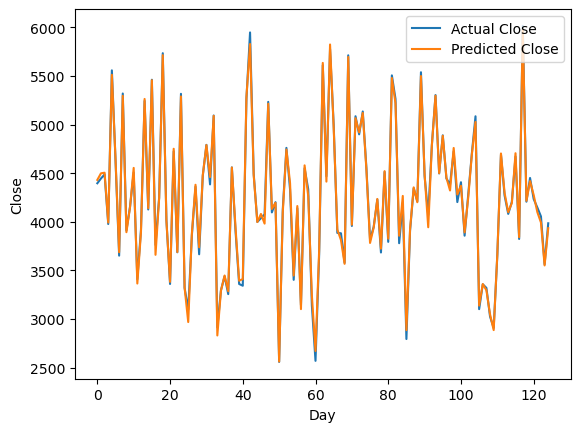

In [625]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()